In [10]:
from pickle import load
from numpy import argmax

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def extract_features(filename, model):
    image = load_img(filename , target_size=(299, 299))
    image = img_to_array(image)
    if image.shape[2] == 4: 
            image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
        
def generate_desc(model, tokenizer, photo, max_length):
        in_text = "start"
        for i in range(max_length):
            sequence = tokenizer.texts_to_sequences([in_text])[0]
            sequence = pad_sequences([sequence], maxlen=max_length)
            pred = model.predict([photo,sequence], verbose=0)
            pred = np.argmax(pred)
            word = word_for_id(pred, tokenizer)
            if word is None:
                break
            in_text += ' ' + word
            if word == 'end':
                break
        return in_text

In [30]:
tokenizer = load(open("tokenizer.pkl", 'rb'))
max_length = 34
model = load_model('models/model_9.h5')
path = 'photo-1533398892249-1d93b83b958d.jpg'
xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(path, xception_model)
description = generate_desc(model, tokenizer, photo, max_length)

    

# plt.imshow("exampl

Description of the image: man is standing on the side of mountain


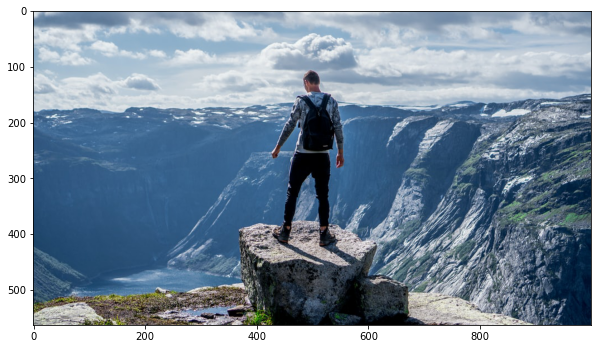

In [33]:
img = Image.open(path)
img = np.array(img)
plt.figure(figsize = (10, 10))
plt.imshow(img)



print("Description of the image: {}".format(' '.join(description.split()[1:-1])))
